In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [4]:
# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
data = pd.read_csv("sample_data.csv")

In [5]:
# -----------------------------
# 2️⃣ Feature Engineering (Segmentation)
# -----------------------------
segment_size = 20000
segments = []

for start in range(0, len(data), segment_size):
    end = start + segment_size
    
    if end > len(data):
        break
    
    segment = data.iloc[start:end]
    
    features = {
        "mean": segment["acoustic_data"].mean(),
        "std": segment["acoustic_data"].std(),
        "max": segment["acoustic_data"].max(),
        "min": segment["acoustic_data"].min(),
        "target": segment["time_to_failure"].values[-1]
    }
    
    segments.append(features)

df = pd.DataFrame(segments)

print("Total segments created:", len(df))


Total segments created: 10


In [6]:
# -----------------------------
# 3️⃣ Train-Test Split
# -----------------------------
X = df[["mean", "std", "max", "min"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# -----------------------------
# 4️⃣ Define Models
# -----------------------------
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

results = []


In [8]:
# -----------------------------
# 5️⃣ Train & Evaluate Models
# -----------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])

print("\nModel Comparison Results:")
print(results_df)


Model Comparison Results:
               Model       MAE      RMSE  R2 Score
0      Random Forest  0.014309  0.014351  0.371407
1  Gradient Boosting  0.003476  0.003635  0.959676
2            XGBoost  0.004763  0.004912  0.926342


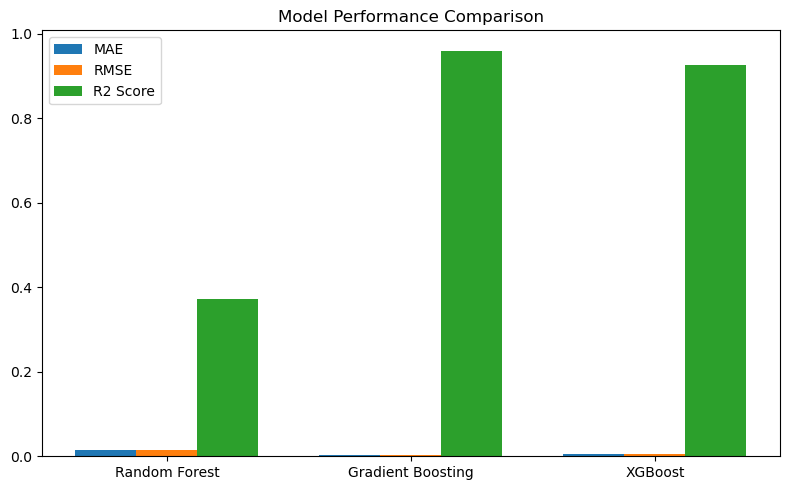

In [12]:
# -----------------------------
# 6️⃣  Model Comparison Graph
# -----------------------------
plt.figure(figsize=(8,5))

x = np.arange(len(results_df["Model"]))
width = 0.25

plt.bar(x - width, results_df["MAE"], width, label="MAE")
plt.bar(x, results_df["RMSE"], width, label="RMSE")
plt.bar(x + width, results_df["R2 Score"], width, label="R2 Score")

plt.xticks(x, results_df["Model"])
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()

plt.savefig("model_comparison.png")
plt.show()

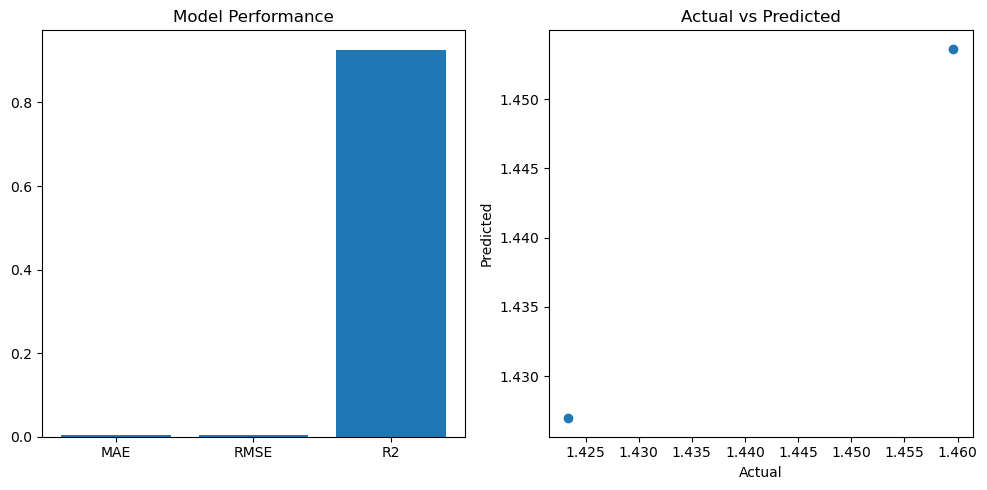

In [13]:
# -----------------------------
# 7️⃣ Model performance and Actual vs Predicted (last model)
# -----------------------------
# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Create single figure
plt.figure(figsize=(10,5))

# ---- Left: Bar Graph ----
plt.subplot(1,2,1)
metrics = ["MAE", "RMSE", "R2"]
values = [mae, rmse, r2]
plt.bar(metrics, values)
plt.title("Model Performance")

# ---- Right: Scatter Plot ----
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.tight_layout()
plt.savefig("final_graph.png")   # One single image
plt.show()